In [16]:
from carla.data.catalog import OnlineCatalog
from carla.models.catalog import MLModelCatalog
from carla.models.negative_instances import predict_negative_instances
import carla.recourse_methods.catalog as recourse_catalog

import numpy as np

from IPython.display import display

import matplotlib.pylab as plt

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# load catalog dataset
data_name = "adult"
dataset = OnlineCatalog(data_name)

In [3]:
# load catalog model
ml_model = MLModelCatalog(
    dataset,
    model_type="ann",
    load_online=True,
    backend="pytorch"
)

In [4]:
# define the recourse method
hyperparams = {"loss_type": "BCE", "binary_cat_features": False}
recourse_method = recourse_catalog.Wachter(ml_model, hyperparams)

In [5]:
# get some negative instances
factuals = predict_negative_instances(ml_model, dataset.df)
factuals = factuals[:25]

In [6]:
df_cfs = recourse_method.get_counterfactuals(factuals)

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanat

In [8]:
nn_cfs = df_cfs.dropna()
nn_factuals = factuals[factuals.index.isin(nn_cfs.index)]

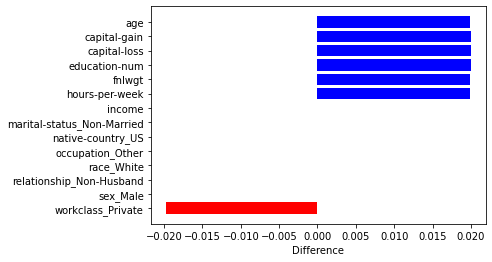

In [47]:
fig, ax = plt.subplots()

y = nn_cfs.iloc[0] - nn_factuals.iloc[0]
x = np.arange(len(y.index))

colors = ["red" if y[i] < 0 else "blue" for i in range(len(y))]

ax.barh(x, y, align='center', color=colors)
ax.set_yticks(x)
ax.set_yticklabels(y.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Difference')
plt.show()

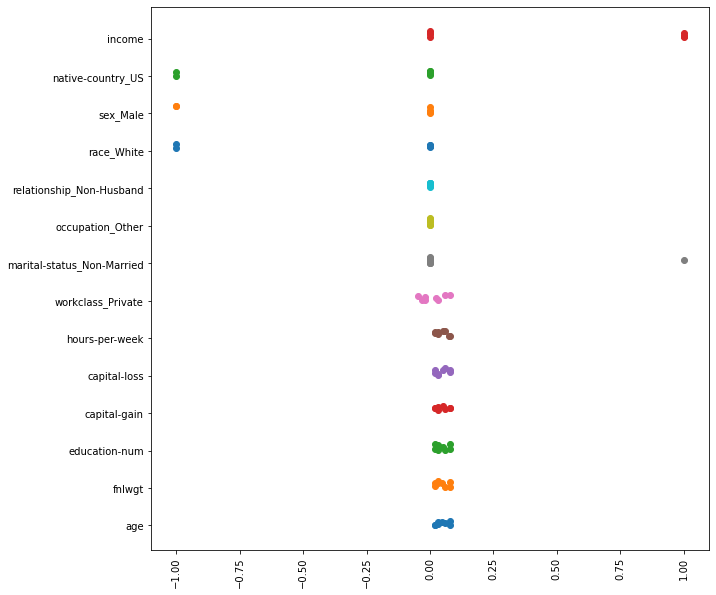

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))

for i, col in enumerate(nn_cfs.columns):
    y = nn_cfs[col] - nn_factuals[col]
    ax.scatter(y, i + (np.random.random(y.size)/5))

ax.set_yticks(np.arange(len(nn_cfs.columns)))
ax.set_yticklabels(nn_cfs.columns)
plt.xticks(rotation=90)
plt.show()